In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import corner 
import matplotlib.lines as mlines
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
%matplotlib inline


 <font size="6">  Load data (Bayes factor based on true/wrong population prior):

In [2]:
true_data = np.load('/Users/damon/desktop/blu_upload/result_data/bluresult_lensedtrue_prior_selection.npz')['bayesfactor']
wrong_data = np.load('/Users/damon/desktop/blu_upload/result_data/bluresult_lensedwrong_prior_selection.npz')['bayesfactor']

In [3]:
def cdf(ax, data, label = None, lw = 3, ls = 'solid', focus_on_peak = False):
    
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    # plot the sorted data:
    ax.plot(data_sorted, 1-p,label=label,linewidth = lw, linestyle=ls)
    
    return ax 

<font size="6"> cumulative fraction on lensed pair

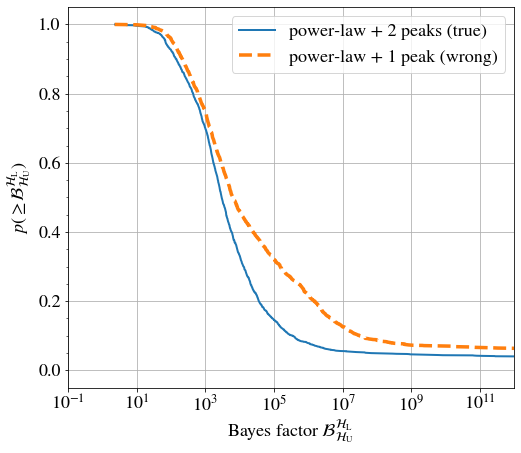

In [4]:

blu = '\mathcal{B}_{\mathcal{H}_{\mathrm{U}}}^{\mathcal{H}_{\mathrm{L}}}'
fig,ax = plt.subplots(1,1,figsize=(8,7))

ax = cdf(ax, true_data, label = 'power-law + 2 peaks (true)',lw = 2, ls='solid')
ax = cdf(ax, wrong_data, label = 'power-law + 1 peak (wrong)',lw = 3.5, ls='dashed')

ax.yaxis.get_ticklocs(minor=True) 

ax.minorticks_on()
ax.set_ylabel(r'$p(\geq '+blu+')$',fontsize=18)
ax.set_xlabel(r'Bayes factor $'+blu+'$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=18, loc = 'upper right')
plt.xscale('log')
plt.xlim(1e-1,1e12)
ax.grid(True)
#fig.savefig('result.pdf')

 <font size="6"> Then we plot the lensed pairs around the peak (m1,m2) = (50,25)

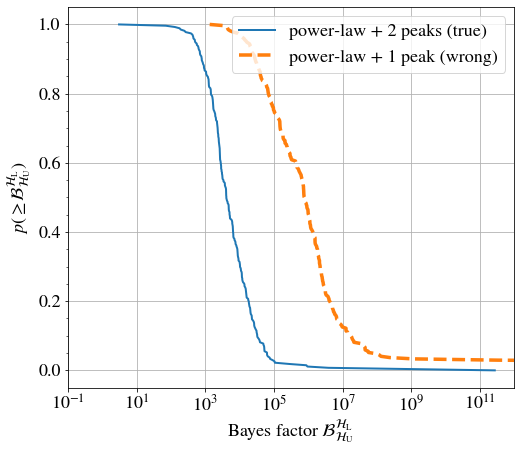

In [5]:
condition_data = np.load('/Users/damon/desktop/blu/blu_new/lensed_p/lensed_ps1986.npz')
list(condition_data.keys())
dm1 = condition_data['l1m1'].mean(axis=1)
dm2 = condition_data['l1m2'].mean(axis=1)
dz = condition_data['l1z'].mean(axis=1)
condition = np.where((dm1>47)&(dm1<53)&(dm2>22)&(dm2<28))[0]


fig,ax = plt.subplots(1,1,figsize=(8,7))


ax = cdf(ax, true_data[condition], label = 'power-law + 2 peaks (true)',lw = 2, ls='solid')

ax = cdf(ax, wrong_data[condition], label = 'power-law + 1 peak (wrong)',lw = 3.5, ls='dashed')


ax.yaxis.get_ticklocs(minor=True) 

ax.minorticks_on()
ax.set_ylabel(r'$p(\geq '+blu+')$',fontsize=18)
ax.set_xlabel(r'Bayes factor $'+blu+'$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(fontsize=18, loc = 'upper right')
plt.xscale('log')
plt.xlim(1e-1,1e12)
ax.grid(True)
#fig.savefig('result.pdf')